In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score
import os
from ast import literal_eval

In [3]:
path = f'{os.getcwd()}\\best_pred.csv'

In [4]:
predY = pd.read_csv(os.getcwd() + '\\best_pred.csv', header=None)
testY = pd.read_csv(os.getcwd() + '\\labels.csv', header=None)

In [5]:
disorders = pd.read_csv(os.getcwd() + '\\data\\raw_ydata.csv')['main.disorder'].to_list()

In [6]:
labels = {}

for n, i in enumerate(np.array(testY)):
    if tuple(i) not in labels.keys():
        labels[tuple(i)] = disorders[n]

labels

{(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Addictive disorder',
 (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0): 'Trauma and stress related disorder',
 (0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0): 'Mood disorder',
 (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0): 'Healthy control',
 (0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0): 'Obsessive compulsive disorder',
 (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0): 'Schizophrenia',
 (0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0): 'Anxiety disorder'}

In [7]:
parsedTestY = [labels[tuple(i)] for i in np.array(testY)]

In [8]:
def smooth_label(x):
    x[x < x[np.argmax(x)]] = 0
    x[x > 0] = 1

    return x

In [9]:
parsedPredY = [labels[tuple(smooth_label(i))] for i in np.array(predY)]

In [10]:
conf_mat = confusion_matrix(parsedTestY, parsedPredY, labels=list(labels.values()))

In [11]:
conf_mat

array([[182,   1,   2,   0,   0,   0,   1],
       [  1, 127,   0,   0,   0,   0,   0],
       [  2,   1, 261,   0,   0,   2,   0],
       [  0,   0,   4,  89,   0,   2,   0],
       [  0,   0,   0,   0,  45,   0,   1],
       [  0,   0,   0,   0,   0, 117,   0],
       [  1,   0,   1,   0,   0,   1, 104]], dtype=int64)

In [12]:
formatted_labels = list(labels.values())
formatted_labels[1] = 'Trauma disorder'
formatted_labels[4] = 'OCD'
formatted_labels

['Addictive disorder',
 'Trauma disorder',
 'Mood disorder',
 'Healthy control',
 'OCD',
 'Schizophrenia',
 'Anxiety disorder']

In [13]:
df_cm = pd.DataFrame(conf_mat, index=formatted_labels, columns=formatted_labels)

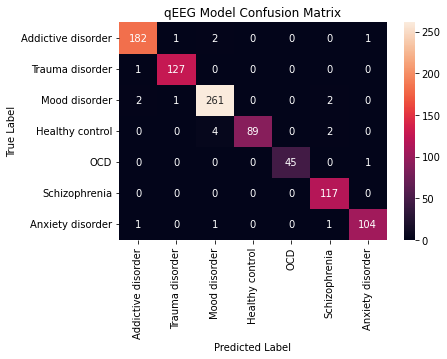

In [14]:
sns.heatmap(df_cm, annot=True, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# plt.xticks(rotation=45, ha='right')
plt.title("qEEG Model Confusion Matrix")
plt.savefig(f'{os.getcwd()}\\Confusion Matrix.png', bbox_inches='tight')
plt.show()

In [15]:
np.mean([i == j for i, j in zip(parsedPredY, parsedTestY)])

0.9788359788359788

In [16]:
accs = {}

In [27]:
for i in range(len(df_cm.index)):
    accs[formatted_labels[i]] = df_cm.iloc[i, i] / np.sum(df_cm.iloc[i, :])

accs

{'Addictive disorder': 0.978494623655914,
 'Trauma disorder': 0.9921875,
 'Mood disorder': 0.981203007518797,
 'Healthy control': 0.9368421052631579,
 'OCD': 0.9782608695652174,
 'Schizophrenia': 1.0,
 'Anxiety disorder': 0.9719626168224299}

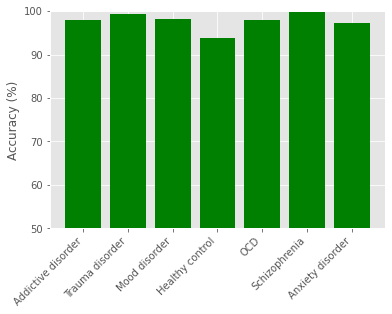

In [18]:
plt.style.use('ggplot')
plt.bar(accs.keys(), [100 * i for i in accs.values()], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylim(50,100)
plt.ylabel('Accuracy (%)')
plt.show()

In [26]:
roc_auc_score(testY, predY, average=None)

array([0.99951832, 0.99974349, 0.99924458, 0.99851064, 1.        ,
       0.99986581, 0.99949319])